In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def BrownianMotion(t0, T, malha):
    """
    T: final time
    malha: number of discretized brownian motion till time T
    """
    dt = (T - t0)/malha
    ts = np.arange(t0, T+dt, dt)
    dws = np.random.normal(0, dt**(1/2), len(ts)-1)
    wiener = list(np.cumsum(dws))
    wiener.insert(0, 0)
    
    return dt, ts, dws, wiener

In [3]:
def BrownianBridge(t0:float, T:float, malha:int, a:float, b:float):
    dt, ts, dws, wiener = BrownianMotion(0, 1, malha)
    standart_bb = [Wt - ts[i] * wiener[-1] for i, Wt in enumerate(wiener)]

    ts = np.linspace(t0, T, malha)

    Bt = [standart_bb[i] + a * (T - t)/(T - t0) + b * (t - t0)/(T - t0) for i, t in enumerate(ts)]
    return standart_bb, wiener, Bt, ts

def MediaTeorica(t: np.array, t0:float, T:float, a:float, b:float):
    return a * (T - t)/(T - t0) + b * (t - t0)/(T - t0)

def VarTeorico(t: np.array, t0:float, T:float, a:float, b:float):
    return np.sqrt((T - t) * (t-t0) / (T-t0))

In [4]:
Bts = []

t0 = -4
T = 10
a = 2
b = -2
malha = 1000

Nsimu = 40
for _ in range(Nsimu):
    bb, wiener, Bt, ts = BrownianBridge(t0, T, malha, a, b)
    Bts.append(Bt)

media = MediaTeorica(ts, t0, T, a, b)
variancia = VarTeorico(ts, t0, T, a, b)

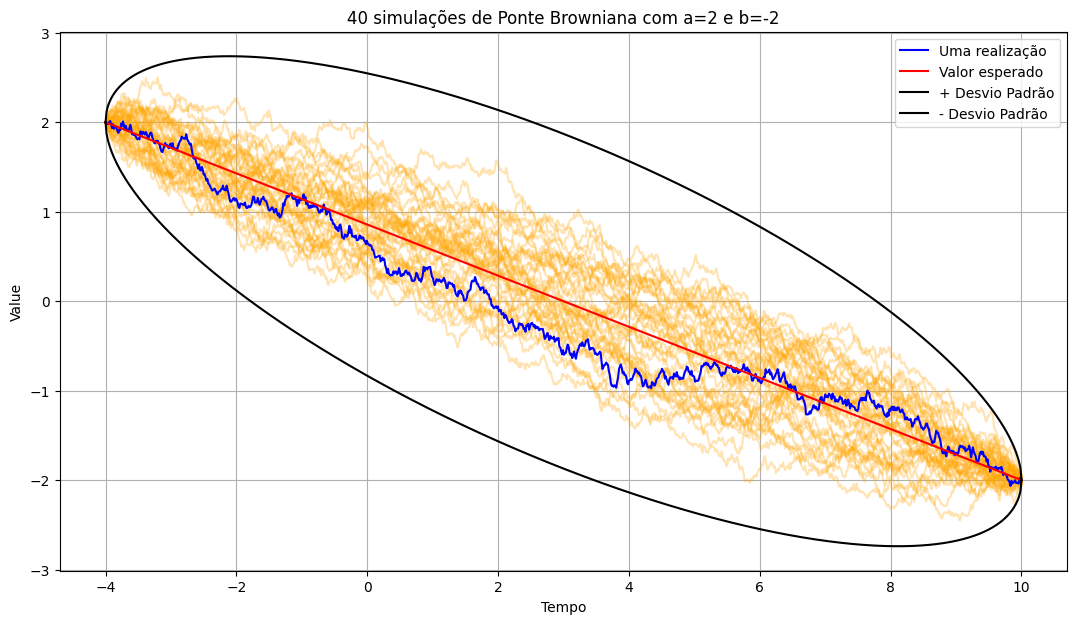

In [5]:
plt.figure(figsize=(13, 7))
for bt in Bts[:-1]:
    plt.plot(ts, bt, color='orange', alpha=0.3)


plt.plot(ts, Bt, color='blue', alpha=1, label='Uma realização')
plt.plot(ts, media, color='red', alpha=1, label='Valor esperado')
plt.plot(ts, variancia + media, color='black', alpha=1, label='+ Desvio Padrão')
plt.plot(ts, -variancia + media, color='black', alpha=1, label='- Desvio Padrão')

plt.title(f"{Nsimu} simulações de Ponte Browniana com a={a} e b={b}")

plt.xlabel("Tempo")
plt.ylabel("Value")

plt.legend()
plt.grid()
plt.show()